<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2024 Printemps</center>

<center>February 20, 2024</center>

# <center><ins>TP Class N°7 - DSP and Complex Numbers</ins></center>

#### *Instructions :*  

<font color=red>**Be careful ! You only have one week to complete this TP !**</font>

* This TP should be completed and uploaded on Moodle before **Thursday 7 March 2024, 23h59**.
* The name of the file you upload should be **TP7_name_surname.ipynb**.
* If you need to include attached files to you TP, please archive them together in a folder named **TP7_name_surname.zip**.

## Exercise 1. The Dirac comb
*2 points*

The Dirac comb or train of impulses is the following ”function”:

$$W_T(t) = \sum_{k \in \mathbb{Z}} \delta(t - k \cdot T) $$

(a) In Python, implement a function

$$
\text{sha}(t, T) =
\left\{
	\begin{array}{ll}
		1  & \text{if t is a multiple of T} \\
		0 & \text{otherwise.}
	\end{array}
\right.
$$

Using *np.linspace()* and *plt.stem()*, represent $\text{sha}(t, 1)$, $\text{sha}(t, 2)$ and $\text{sha}(t, 4)$ on a range $t \in [-10, 10]$.

**Remark:** Use $num=201$ in *np.linspace()*. Why is this value important ?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

(b) Explain why sampling a function at rate $1/T$ is equivalent to multiplying it with $W_T(t)$.

> Answer here

(c) Illustrate this fact by sampling $f(t) = \sin(\frac{\pi}{2} t + \pi/4)$ with $T = 1$, $2$, $4$. Display the results on separate graphs. On each graph, plot the original function $f(t)$ using *plt.plot()* and the sampled version using *plt.stem()*. Comment the results in view of signal preservation.

> Answer here

## Exercise 2. Complex function visualization
*2 points*

In this exercise, you will visualize a complex polynomial function using complex numpy arrays. Consider

$$f(z) = z^3 - 1$$

(a) Implement the function $f(z)$ in Python. Show that $1$, $e^{j2\pi/3}$ and $e^{j4\pi/3}$ are complex roots of $f(z)$. Find their real and imaginary parts.

We note:
- $x_1$ the result of $f(1)$
- $x_2$ the result of $f(e^{j2\pi/3})$
- $x_3$ the result of $f(e^{j4\pi/3})$

In [3]:
def f(z: complex) -> complex:
    return z**3 - 1


x_1 = f(1)
x_2 = f(np.exp(1j * 2 * np.pi / 3))
x_3 = f(np.exp(1j * 4 * np.pi / 3))
assert x_1 == 0, "1 is not a complex root of f"
assert x_2 == 0 or x_2 < 1e-16, "exp(j(2pi/3)) is not a complex root of f"
assert x_3 == 0 or x_3 < 1e-16, "exp(j(4pi/3)) is not a complex root of f"
print(f"Real part of x_1: {x_1.real}")
print(f"Imaginary part of x_1: {x_1.imag}")
print(f"Real part of x_2: {x_2.real}")
print(f"Imaginary part of x_2: {x_2.imag}")
print(f"Real part of x_3: {x_3.real}")
print(f"Imaginary part of x_3: {x_3.imag}")

Real part of x_1: 0
Imaginary part of x_1: 0
Real part of x_2: -2.220446049250313e-16
Imaginary part of x_2: -6.106226635438361e-16
Real part of x_3: 0.0
Imaginary part of x_3: -1.5543122344752192e-15


We want to prove theoricaly the results above.

We have:
- $$x_1 = f(1) = 1^3 - 1 = 0$$

    So 1 is a complex root of $f(z)$
- $$x_2 = f(e^{j2\pi/3}) = (e^{j2\pi/3})^3 - 1 = e^{j2\pi} - 1 = cos(2\pi) + jsin(2\pi) - 1 = 1 + 0 - 1 = 0$$
    So $e^{j2\pi/3}$ is a complex root of $f(z)$
- $$x_3 = f(e^{j4\pi/3}) = (e^{j4\pi/3})^3 - 1 = e^{j4\pi} - 1 = cos(4\pi) + jsin(4\pi) - 1 = 1 + 0 - 1 = 0$$
    So $e^{j4\pi/3}$ is a complex root of $f(z)$

We can observe that the results found in python are not exactly 0 but $O(10^{-16})$. It's because we work in a machine and the precision of the machine is not unlimited.


(b) Create a numpy complex matrix $z$ of size $100 \times 100$ whose entries range from $[-2, 2]$ both in real and imaginary parts.

**Hint :** Use *np.linspace()*, *np.meshgrid()* and define $z = xx + yy * (-1j)$.

Note the minus sign in front of $1j$, we put it to counterbalance the fact that numpy stores values from top to bottom.

In [4]:
my_range = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(my_range, my_range)
zz = xx + yy * (-1j)

[[-2.        +2.j         -1.95959596+2.j         -1.91919192+2.j
  ...  1.91919192+2.j          1.95959596+2.j
   2.        +2.j        ]
 [-2.        +1.95959596j -1.95959596+1.95959596j -1.91919192+1.95959596j
  ...  1.91919192+1.95959596j  1.95959596+1.95959596j
   2.        +1.95959596j]
 [-2.        +1.91919192j -1.95959596+1.91919192j -1.91919192+1.91919192j
  ...  1.91919192+1.91919192j  1.95959596+1.91919192j
   2.        +1.91919192j]
 ...
 [-2.        -1.91919192j -1.95959596-1.91919192j -1.91919192-1.91919192j
  ...  1.91919192-1.91919192j  1.95959596-1.91919192j
   2.        -1.91919192j]
 [-2.        -1.95959596j -1.95959596-1.95959596j -1.91919192-1.95959596j
  ...  1.91919192-1.95959596j  1.95959596-1.95959596j
   2.        -1.95959596j]
 [-2.        -2.j         -1.95959596-2.j         -1.91919192-2.j
  ...  1.91919192-2.j          1.95959596-2.j
   2.        -2.j        ]]


(c)  Apply the function $f$ to the matrix $z$, using pointwise operations, giving you a new complex matrix $w$ of same size.

In [5]:
# Vectorize the f function (this will create a function which iterate on each point of the matrix and compute the result)
vectorized_function = np.vectorize(f)
w = vectorized_function(zz)

(d)  Use the function *np.abs()* on $w$ and visualize the result as an image, with its colorbar.

**Hint :** To have interpretable coordinates, use parameter *extent* of *plt.imshow()*.

We also recommand to use the 'hsv' colormap which has stronger constrast than the default one.

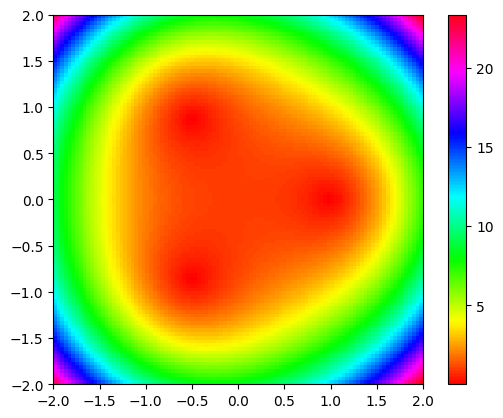

In [6]:
plt.figure()
plt.imshow(np.abs(w), cmap='hsv', extent= (-2, 2, -2, 2))
plt.colorbar()
plt.show()

(e) To further enhance the contrast, we will use a logarithmic scale.

Instead of visualizing directly $|w|$,  first apply the transformation $m = \log(1 + |w|)$ and use *plt.imshow()* on $m$. This trick will come very often when we will investigate the magnitude of complex images. Comment the resulting image.

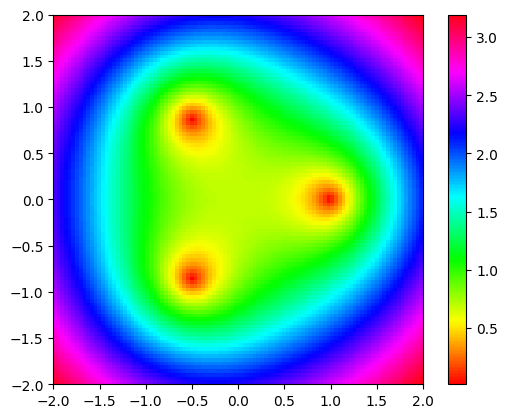

In [7]:
plt.figure()
plt.imshow(np.log(1 + np.abs(w)), cmap='hsv', extent=(-2, 2, -2, 2))
plt.colorbar()
plt.show()

> Answer here

(f) Visualise now the real and imaginary parts of $w$ on two different plots. When is $f(z)$ a real number ?

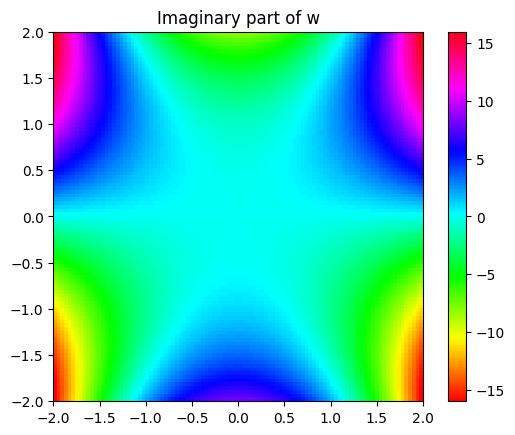

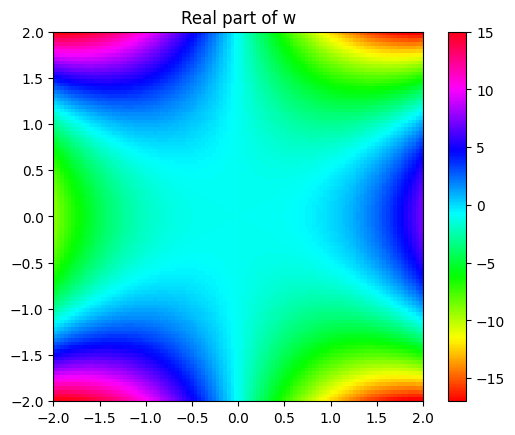

In [8]:
plt.figure()
plt.title("Imaginary part of w")
plt.imshow(w.imag, 'hsv', extent=(-2, 2, -2, 2))
plt.colorbar()
plt.show()

plt.figure()
plt.title("Real part of w")
plt.imshow(w.real, 'hsv', extent=(-2, 2, -2, 2))
plt.colorbar()
plt.show()

> Answer here

(g) Finally, visualise the phase of $w$ using *np.angle()* and plot the colorbar as well. Give a new interpretation on when is $f(z)$ a real number based on the value of the phase.

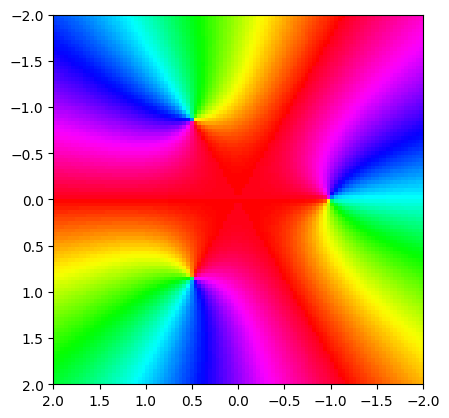

In [9]:
plt.figure()
plt.imshow(np.angle(w), cmap='hsv', extent=(2, -2, 2, -2))
plt.show()

> Answer here

(h) *(Bonus)*  Prove points (f) and (g) by computing explicitely the developpement of $f(a+jb)$ and finding a relation between $a$ and $b$.

> Answer here

$$f(a + jb)$$
$$= (a + jb)^3 -1$$
Recall: the binom Newtow formula is:

For $n \in \mathbb{N}^*$ and $a, b \in \mathbb{C}$, we can write: $(a + b)^n = \sum_{k = 0}^n \binom{n}{k}a^kb^{n - k}$
So we have:
$$(a + jb)^3 - 1$$
$$=\binom{3}{0} a^0 (bj)^{3 - 0} + \binom{3}{1} a^1 (bj)^{3 - 1} + \binom{3}{2} a^2 (bj)^{3 - 2} + \binom{3}{3} a^3 (bj)^{3 - 3}$$
$$=(bj)^3 + 3$$

## Exercise 3. Fourier Series 101
*2 points*

The goal of this exercise is to see a very simple example of a Fourier serie decomposition. Consider the following function:

$$\tilde{f}(t) = 2 \sin(5t + \pi/3)$$

(a) Compute the amplitude, the frequency, the phase and the period of this sinusoid.

> Answer here

(b) Based on the three different formulations of the Fourier series (Theme 7, pp.51-52), compute the coefficients $A_k$ and $\phi_k$ for $k = 1,2,3,...$ \\

**Hint :** Most of them are equal to $0$.

> Answer here

(c) Use trigonometric formulas to write $\tilde{f}(t)$ as a sum of sine and cosine functions. Compute $a_k$ and $b_k$ for $k = 1,2,3,...$

> Answer here

(d) Use the conversion formulas and compute $F_k \in \mathbb{C}$ for $k = 0, \pm 1, \pm 2, ...$

> Answer here

(e) What are the even and odd parts of this function $f_{even}(t)$ and $f_{odd}(t)$ ?

> Answer here